# Multiple Regression
### We have the historical data of different stock markets. SPY is an exchange traded fund which trades on NYSE

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#To ignore the library deprecation warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
#To import all the stock market data into a DataFrame
aord = pd.DataFrame.from_csv('../data/indice/ALLOrdinary.csv')
nikkei = pd.DataFrame.from_csv('../data/indice/Nikkei225.csv')
hsi = pd.DataFrame.from_csv('../data/indice/HSI.csv')
daxi = pd.DataFrame.from_csv('../data/indice/DAXI.csv')
cac40 = pd.DataFrame.from_csv('../data/indice/CAC40.csv')
sp500 = pd.DataFrame.from_csv('../data/indice/SP500.csv')
dji = pd.DataFrame.from_csv('../data/indice/DJI.csv')
nasdaq = pd.DataFrame.from_csv('../data/indice/nasdaq_composite.csv')
spy = pd.DataFrame.from_csv('../data/indice/SPY.csv')

### Step 1: Data Munging

In [4]:
# We will create a new dataframe called as indice
# Due to the timezone issues, we extract and calculate appropriate stock market data for analysis

indice = pd.DataFrame(index = spy.index)

indice['spy'] = spy['Open'].shift(-1) - spy['Open']
indice['spy_lag1'] = indice['spy'].shift(1)
indice['sp500']=sp500["Open"]-sp500['Open'].shift(1)
indice['nasdaq']=nasdaq['Open']-nasdaq['Open'].shift(1)
indice['dji']=dji['Open']-dji['Open'].shift(1)

indice['cac40']=cac40['Open']-cac40['Open'].shift(1)
indice['daxi']=daxi['Open']-daxi['Open'].shift(1)

indice['aord']=aord['Close']-aord['Open']
indice['hsi']=hsi['Close']-hsi['Open']
indice['nikkei']=nikkei['Close']-nikkei['Open']
indice['Price']=spy['Open']


In [5]:
indice.head()

,spy,spy_lag1,sp500,nasdaq,dji,cac40,daxi,aord,hsi,nikkei,Price
Date,,,,,,,,,,,
2008-01-02,-1.619995,NaN,NaN,NaN,NaN,NaN,NaN,-50.100097,-71.679688,NaN,146.529999
2008-01-03,-1.570008,-1.619995,-20.419922,-41.949951,-217.70019,-71.779785,-104.450195,-2.300293,-162.750000,NaN,144.910004
2008-01-04,-1.529998,-1.570008,-3.540039,-40.879883,2.43945,5.489746,-27.990235,NaN,515.349609,-464.320313,143.339996
2008-01-07,0.270004,-1.529998,-29.940064,-56.930176,-245.40918,-111.689941,-102.709961,-27.500000,216.951171,-48.830078,141.809998
2008-01-08,-2.990006,0.270004,1.640015,-7.179931,19.75000,44.509766,33.680176,-33.899902,-354.060547,99.370117,142.080002


In [6]:
#Checking whether the rows have any null values and if yes, how many
indice.isnull().sum() 

spy           1
spy_lag1      1
sp500         1
nasdaq        1
dji           1
cac40        30
daxi         53
aord        319
hsi         121
nikkei      145
Price         0
dtype: int64

In [7]:
#Handling all the null values in the DataFrame

#Forward-filling
indice = indice.fillna(method = 'ffill')

#Backward-Filling
indice = indice.dropna()

In [8]:
indice.isnull().sum()

spy         0
spy_lag1    0
sp500       0
nasdaq      0
dji         0
cac40       0
daxi        0
aord        0
hsi         0
nikkei      0
Price       0
dtype: int64

In [9]:
#Save this to the path 
path_save = '../data/indice/indicepanel.csv'
indice.to_csv(path_save)

In [10]:
indice.shape

(2677, 11)

### Step 2: Train-Test splitting

In [11]:
# Splitting the dataframe into 70% train and 30% test
train = indice.iloc[:-800,:]
test = indice.iloc[-800:,:]
print(train.shape, test.shape)

(1877, 11) (800, 11)


### Step 3: Exploring the train dataset

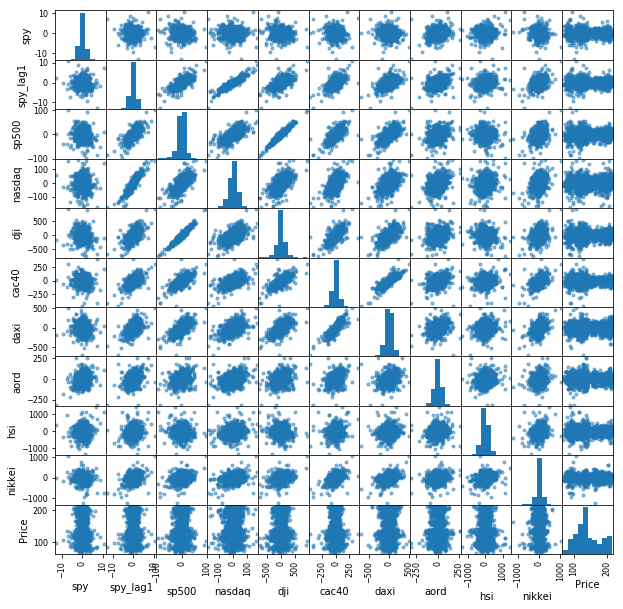

In [12]:
# Creating a scatter-matrix 
from pandas.tools.plotting import scatter_matrix
sm = scatter_matrix(train, figsize = (10,10))

### Step 4: Check the correlation and implement the model

In [13]:
# Check the correlation of each index with SPY using a correlation matrix
corr_mat = train.iloc[:,:-1].corr()['spy']
print(corr_mat)

spy         1.000000
spy_lag1   -0.055994
sp500      -0.076075
nasdaq     -0.033650
dji        -0.076120
cac40      -0.054578
daxi       -0.064588
aord        0.219000
hsi         0.071809
nikkei     -0.063814
Name: spy, dtype: float64


There is some significant positive correlation between spy and aord

In [14]:
# Implementing the OLS
formula = 'spy~spy_lag1+sp500+nasdaq+dji+cac40+daxi+aord+hsi+nikkei'

import statsmodels.formula.api as smf
model = smf.ols(formula = formula, data = train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    spy   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     20.06
Date:                Tue, 21 Apr 2020   Prob (F-statistic):           1.75e-32
Time:                        23:36:13   Log-Likelihood:                -3460.6
No. Observations:                1877   AIC:                             6941.
Df Residuals:                    1867   BIC:                             6996.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0398      0.036      1.120      0.263      -0.030       0.110
spy_lag1      -0.1653      0.065     -2.547      0.011      -0.293      -0.038
sp500         -0.0073      0.012     -0.622      0.534      -0.031       0.016
nasdaq         0.0042      0.003      1.450      0.147      -0.001       0.010
dji            0.0004      0.001      0.304      0.761      -0.002       0.003
cac40          0.0002      0.001      0.141      0.888      -0.002       0.003
daxi          -0.0014      0.001     -1.837      0.066      -0.003    9.39e-05
aord           0.0102      0.001     12.000      0.000       0.009       0.012
hsi            0.0004      0.000      2.531      0.011    9.94e-05       0.001
nikkei        -0.0009      0.000     -2.920      0.004      -0.001      -0.000
==============================================================================
Omnibus:                      202.362   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1464.174
Skew:                          -0.204   Prob(JB):                         0.00
Kurtosis:                       7.308   Cond. No.                         421.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Step 5 : Make prediction

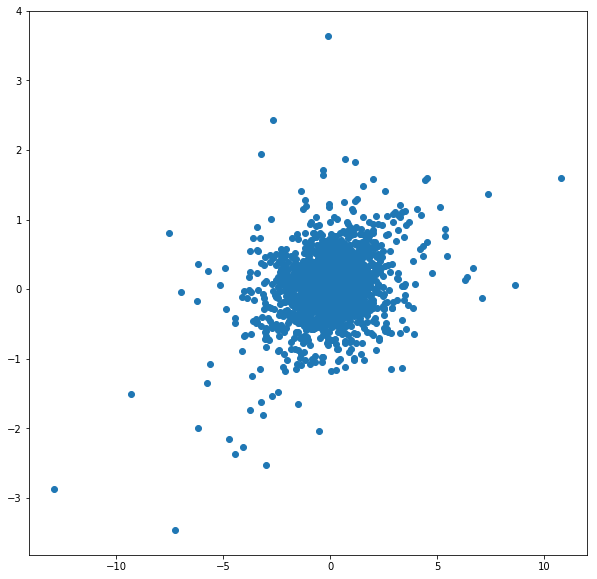

In [15]:
# Predicting the train and test values
train['predictedY'] = model.predict(train)
test['predictedY'] = model.predict(test)

# Plotting them on a scatter plot
plt.figure(figsize = (10,10))
plt.scatter(train['spy'], train['predictedY'])

### Step 6 : Performance evaluation using RMSE and Adjusted R square

In [16]:
# RMSE - Root Mean Squared Error, Adjusted R^2
def adjustedMetric(data, model, model_k, yname):
    data['yhat'] = model.predict(data)
    SST = ((data[yname] - data[yname].mean())**2).sum()
    SSR = ((data['yhat'] - data[yname].mean())**2).sum()
    SSE = ((data[yname] - data['yhat'])**2).sum()
    r2 = SSR/SST
    adjustR2 = 1 - (1-r2)*(data.shape[0] - 1)/(data.shape[0] -model_k -1)
    RMSE = (SSE/(data.shape[0] -model_k -1))**0.5
    return adjustR2, RMSE

In [17]:
def assessTable(test, train, model, model_k, yname):
    r2test, RMSEtest = adjustedMetric(test, model, model_k, yname)
    r2train, RMSEtrain = adjustedMetric(train, model, model_k, yname)
    assessment = pd.DataFrame(index=['R2', 'RMSE'], columns=['train', 'test'])
    assessment['train'] = [r2train, RMSEtrain]
    assessment['test'] = [r2test, RMSEtest]
    return assessment

In [18]:
# Get the assement table fo our model
assessTable(test, train, model, 9, 'spy')

,train,test
R2,0.083766,0.065314
RMSE,1.533256,1.733162


### Step 7 : Evaluating the profit of Signal based strategy

In [19]:
# Calculating the profit and the wealth in train
train['order'] = [1 if sig>0 else -1 for sig in train['predictedY']]
train['profit'] = train['spy'] * train['order']
train['wealth'] = train['profit'].cumsum()
print('Total profit is:', train['profit'].sum())

Total profit is: 491.759779


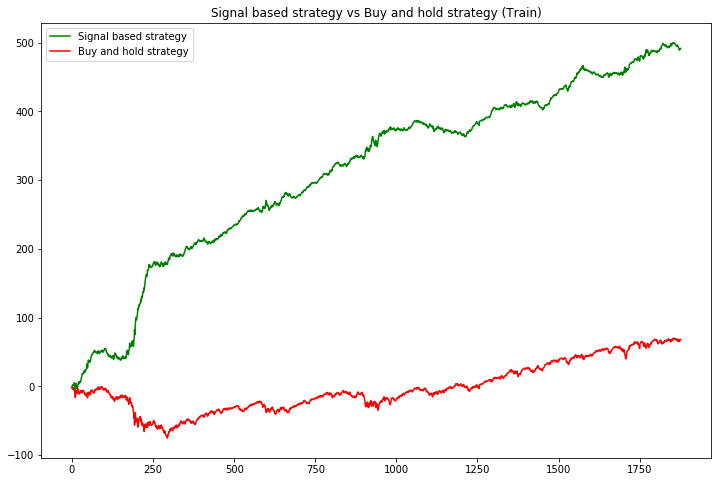

In [20]:
# Plotting on train
plt.figure(figsize = (12,8))
plt.title('Signal based strategy vs Buy and hold strategy (Train)')
plt.plot(train['wealth'].values, color = 'green', label = 'Signal based strategy')
plt.plot(train['spy'].cumsum().values, color='red', label = 'Buy and hold strategy')
plt.legend()
plt.show()

In [21]:
# Calculating profit and wealth on test
test['order'] = [1 if sig>0 else -1 for sig in test['predictedY']]
test['profit'] = test['spy'] * test['order']
test['wealth'] = test['profit'].cumsum()
print('The profit is:', test['profit'].sum())

The profit is: 218.709878


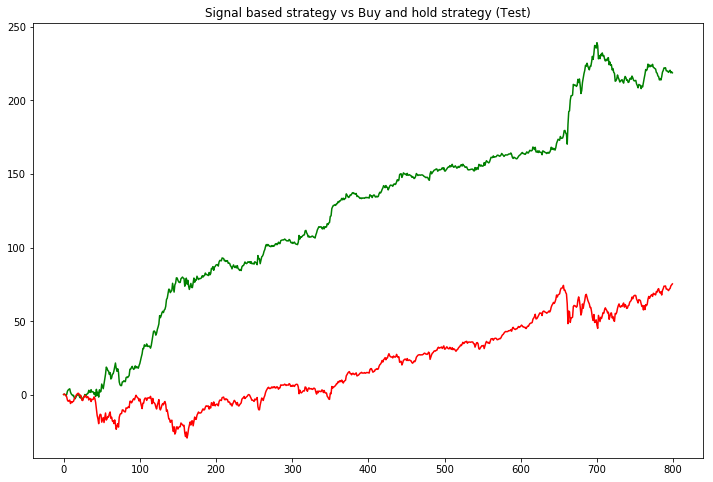

In [22]:
#Plotting on test

plt.figure(figsize = (12,8))
plt.title('Signal based strategy vs Buy and hold strategy (Test)')
plt.plot(test['wealth'].values, color = 'green')
plt.plot(test['spy'].cumsum().values, color='red')
plt.legend()
plt.show()

### Step 8 : Practical Evaluation of model

In [24]:
train['wealth'] = train['wealth'] + train.loc[train.index[0],'Price']
test['wealth'] = test['wealth'] + test.loc[test.index[0],'Price']

#### Sharpe ratio

In [29]:
# Sharpe ration for train dataset
train['return'] = np.log(train['wealth']) - np.log(train['wealth'].shift(1))
dailyr = train['return'].dropna()

print('The daily Sharpe ratio is:', dailyr.mean()/dailyr.std(ddof=1))
print('The annual Sharpe ratio is:', (252**0.5)*dailyr.mean()/dailyr.std(ddof=1))

The daily Sharpe ratio is: 0.14165008099
The annual Sharpe ratio is: 2.24862532495


In [30]:
# Sharpe ratio for test data

test['wealth'] = np.log(test['wealth']) - np.log(test['wealth'].shift(1))
dailyr = test['wealth'].dropna()

print('The daily Sharpe ratio is:', dailyr.mean()/dailyr.std(ddof=1))
print('The annual Sharpe ration is:', (252**0.5)*dailyr.mean()/dailyr.std(ddof=1))

The daily Sharpe ratio is: 0.157534912168
The annual Sharpe ration is: 2.50078920245


#### Maximum drawdown

In [31]:
# Calculating the maximum drawdown for train 
train['peak'] = train['wealth'].cummax()
train['drawdown'] = (train['peak'] - train['wealth'])/train['peak']
print('The maximum drawdown in test is:', train['drawdown'].max())

The maximum drawdown in test is: 0.0863651305275


In [32]:
# Calculating the maximum drawdown for test
test['peak'] = test['wealth'].cummax()
test['drawdown'] = (test['peak'] - test['wealth'])/test['peak']
print('The maximum drawdown in test is:', test['drawdown'].max())

The maximum drawdown in test is: 3.70353254901
